## __Data Exploration Using SMOTE__
Let's see how to prepare, explore, and visualize the data. Also, let's learn how to train the logistic model and evaluate the data.

## Step 1: Import the Required Libraries and Read the Dataset

- Let's start by importing the required libraries, such as Pandas, Matplotlib.pyplot, and Numpy.


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

- From the local drive, upload and read the __cuisines__ dataset.

In [44]:
df  = pd.read_csv('cuisines.csv')

- The head() function gives the first five rows of the data.

In [45]:
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


- Let's see the data types using the info() method.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


In [47]:
df['cuisine'].unique()

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

__Observationunique

- The dataset has 385 entries, with 384 numerical and 1 categorical entry.

## Step 2: Visualize Cuisine Distribution and Create Cuisine-Specific DataFrames

- Plot the distribution of cuisines. Use the bar graph to plot the value counts of different cuisines.


<AxesSubplot: >

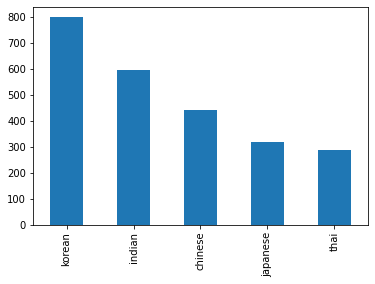

In [48]:
df.cuisine.value_counts().plot.bar()

- Create a DataFrame for each cuisine
- Print the shape of each DataFrame to get the number of rows and columns in each DataFrame

In [49]:
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


Step 3: Create a Function to Analyze Ingredient Usage

- Define a function to create an ingredient DataFrame
- Create a function, create_ingredient(), in Python to create an ingredient DataFrame
- This function will remove an unnecessary column and count the ingredients.

In [50]:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,inplace=False)
    return ingredient_df

- Check and plot the top 10 ingredients for each cuisine

<AxesSubplot: >

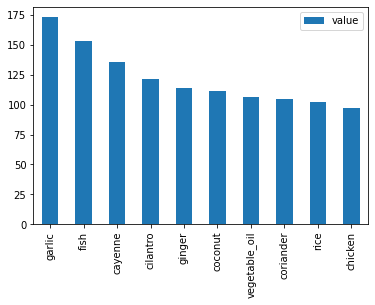

In [51]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.bar()

<AxesSubplot: >

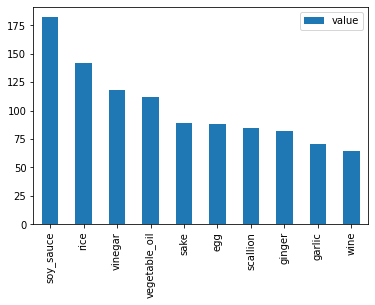

In [52]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.bar()

<AxesSubplot: >

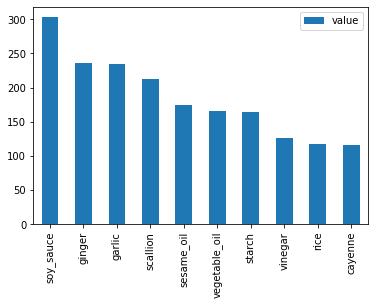

In [53]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.bar()

<AxesSubplot: >

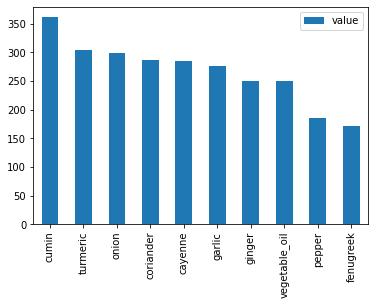

In [54]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.bar()

<AxesSubplot: >

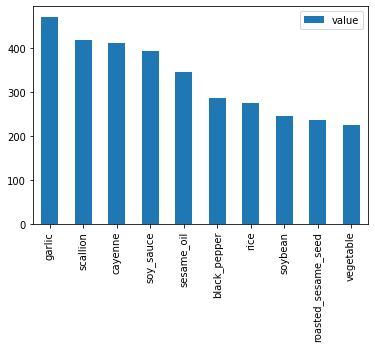

In [55]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.bar()

In [56]:
korean_ingredient_df.T

,garlic,scallion,cayenne,soy_sauce,sesame_oil,black_pepper,rice,soybean,roasted_sesame_seed,vegetable,...,red_algae,corn_flake,roasted_beef,cognac,salmon,maple_syrup,scallop,cilantro,cider,sauerkraut
value,472.0,419.0,413.0,394.0,346.0,287.0,275.0,245.0,236.0,226.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


- It is apparent that there are common ingredients in each cuisine.
- They can be dropped so that they do not influence the model.

In [57]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
labels_df.value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64

In [59]:
feature_df.shape

(2448, 380)

__Observation:__
- You can also see that all the cuisines here have different numbers of observations.
- This is called an imbalanced dataset.
- To balance this, we can use a technique called SMOTE.

## Step 4: Prepare the Data for Classification


- Import and use oversampling from SMOTE
- Once imported, transform the same using the features and labels df.


In [60]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

- Check out the new value counts for each cuisine
- Compare the new counts with the old counts

In [61]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64
old label count: korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64


__Observation__:
- You can see that all the cuisines have 799 rows now.

In [62]:
transformed_feature_df

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 5: Train a Logistic Regression Model

- Import the libraries for logistic regression model



In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

- Split the data into training and testing sets in the ratio 70:30

In [64]:
X_train, X_test, y_train, y_test = train_test_split(transformed_feature_df, transformed_label_df, test_size=0.3)

In [65]:
y_test.value_counts()

thai        253
chinese     241
indian      240
korean      237
japanese    228
Name: cuisine, dtype: int64

In [66]:
y_train.value_counts()

japanese    571
korean      562
indian      559
chinese     558
thai        546
Name: cuisine, dtype: int64

- Train the logistic regression model and calculate the accuracy.
- The model **lr** is fitted to the variable model.
- Next, accuracy needs to be calculated using the method model.

In [67]:
lr = LogisticRegression(multi_class='ovr',solver='liblinear')
model = lr.fit(X_train, np.ravel(y_train))

In [68]:
y_predict = model.predict(X_test)

In [69]:
accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.8140116763969975


In [70]:
train_accuracy = model.score(X_train, y_train)
print("Training accuracy is {}".format(train_accuracy))

Training accuracy is 0.8351216022889842


In [71]:
print(accuracy_score(y_test, y_predict))

0.8140116763969975


In [77]:
model.classes_

array(['chinese', 'indian', 'japanese', 'korean', 'thai'], dtype=object)

In [81]:
model.predict_proba(X_test[:5])

array([[2.17562403e-03, 1.00842386e-03, 7.61007313e-03, 2.91937858e-02,
        9.60012093e-01],
       [1.32446504e-01, 1.19526593e-02, 6.90471948e-01, 1.47635499e-01,
        1.74933899e-02],
       [2.14702029e-02, 3.14266900e-04, 7.59033189e-01, 1.36279570e-01,
        8.29027718e-02],
       [2.49440384e-01, 7.05790693e-04, 1.28631631e-04, 7.42527752e-01,
        7.19744179e-03],
       [2.36973163e-01, 1.43695573e-01, 2.45067371e-01, 9.05463064e-02,
        2.83717587e-01]])

In [83]:
y_pred = model.predict(X_test[:5])
y_pred

array(['thai', 'japanese', 'japanese', 'korean', 'thai'], dtype=object)

__Observation:__
- From the results, it is apparent that the accuracy is 78 percent.

In [84]:
for x_prob in model.predict_proba(X_test[:5]):
    pred_label = model.classes_[np.argmax(x_prob)]
    print(pred_label)

thai
japanese
japanese
korean
thai



## Step 6: Make Predictions and Analyze the Results

- Now, let's make a prediction for a specific test instance.
- Let's calculate and print the probabilities for each class.
- Display the top predicted cuisines


In [90]:
print(X_test.iloc[50])

almond        0
angelica      0
anise         0
anise_seed    0
apple         0
             ..
wood          0
yam           0
yeast         0
yogurt        0
zucchini      0
Name: 1442, Length: 380, dtype: int64


In [91]:
print(f'ingredients: {X_test.iloc[50][X_test.iloc[50]!=0].keys()}')
print(f'cuisine: {y_test.iloc[50]}')

ingredients: Index(['soybean', 'vegetable'], dtype='object')
cuisine: korean


- In the above code, we are entering one ingredient as an input. The prediction is displayed as thai, along with the ingredients for the same.

- Let's test what our model will predict.
- Since we want the probability, we can use the predict_proba method.
- Let's store the value in the resultdf DataFrame.
- Finally, let's sort the values by index values.





In [117]:
test= X_test.iloc[50].values.reshape(1,-1)
test

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [118]:
test= X_test.iloc[50].values.reshape(-1, 1).T
proba = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)

topPrediction = resultdf.T.sort_values(by=[0], ascending = [False])
topPrediction.head()

/usr/local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
korean,0.601435
japanese,0.193329
chinese,0.125339
thai,0.052841
indian,0.027056


__Observation:__
 - As you can see, our model can predict thai as the cuisine with high probability.

## Step 7: Evaluate the Model

- Generate a classification report to evaluate the model's performance
- Now, let's check the classification report using the method classification_report.


In [74]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.76      0.75      0.76       241
      indian       0.94      0.88      0.91       240
    japanese       0.75      0.81      0.78       228
      korean       0.83      0.76      0.80       237
        thai       0.80      0.86      0.83       253

    accuracy                           0.81      1199
   macro avg       0.82      0.81      0.81      1199
weighted avg       0.82      0.81      0.81      1199



__Observation:__
- As we already know, the accuracy is calculated to be 79 percent.